<a href="https://colab.research.google.com/github/MillicentMalinga/DSA_Summative/blob/MILLICENT/AI_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
%cd drive/MyDrive


[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [6]:
%cd datafiles

/content/drive/MyDrive/datafiles


In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('heart.csv')

## INSPECTING DATASET


In [9]:
data.shape

(303, 14)

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The columns names represent the following:

1. (age)
2. (sex)
3. (cp) - chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. (trestbps) -  resting blood pressure (in mm Hg on admission to the hospital)
5.  (chol) - serum cholestoral in mg/dl
6. (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) - resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) -  maximum heart rate achieved
9. (exang) - exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) - ST depression induced by exercise relative to rest
11. (slope) - the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. (ca) - number of major vessels (0-3) colored by flourosopy
13. (thal) - thalassemia Value 
Value 3: fixed defect (no blood flow in some part of the heart)
Value 6: normal blood flow
Value 7: reversible defect (a blood flow is observed but it is not normal)

In [11]:
data.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [13]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data.target.mean()

0.5445544554455446

In [15]:
data.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

## PREPROCESSING FOR TRAINING

#### SPLITTING INTO X AND Y


In [16]:
y = data[['target']]


In [17]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [18]:
y['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [19]:
X = data.drop('target', axis=1)


In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### SPLITTING DATA FOR TRAINING AND TESTING

In [21]:
from sklearn.model_selection import train_test_split


Using Stratify so that the test and train data can have equal proportions of the classes 1 and 0.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [23]:
y_train['target'].value_counts(normalize=True)

1    0.546256
0    0.453744
Name: target, dtype: float64

In [24]:
y_test['target'].value_counts(normalize=True)



1    0.539474
0    0.460526
Name: target, dtype: float64

#### SCALING CONTINUOUS DATA


In [25]:
### AGE, TRESTBPS, CHOL, THALACH, OLDPEAK
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
66,-0.345369,1,2,-1.790482,-0.467212,0,1,-0.305248,1,0.094459,1,0,2
260,1.285674,0,0,2.664587,-0.340045,1,1,0.685916,1,-0.070481,1,2,3
289,0.089576,0,0,-0.191226,-0.827517,0,2,-0.890937,1,0.754216,1,1,3
237,0.633257,1,0,0.494169,1.037594,0,0,0.911181,0,0.094459,1,2,3
144,2.373036,0,2,0.494169,-0.997073,0,2,-1.521677,0,0.011989,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.198312,1,2,-0.076994,0.253400,1,0,-0.350301,1,-0.400360,1,1,1
60,1.829355,0,2,-1.219319,0.444150,1,0,-0.890937,0,-0.895178,2,1,2
128,-0.236633,0,2,0.265704,-1.018267,0,0,0.866128,0,-0.812708,1,0,2
53,-1.106523,0,2,-1.333551,-2.183962,0,1,1.136445,0,-0.400360,1,0,2


In [26]:
X_train.var()

age         1.004425
sex         0.215898
cp          1.014892
trestbps    1.004425
chol        1.004425
fbs         0.118436
restecg     0.283459
thalach     1.004425
exang       0.223695
oldpeak     1.004425
slope       0.378543
ca          1.100386
thal        0.366730
dtype: float64

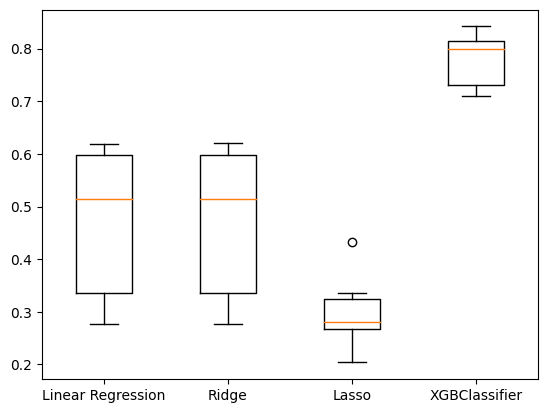

In [27]:
##### Model selection
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),
          "Lasso": Lasso(alpha=0.1), "XGBClassifier": 
          xgb.XGBClassifier(objective="binary:logistic", n_estimators=10,
                            seed=123)}
results = []

# Loop through the models' values


for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [43]:
#### 

In [28]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error 
import numpy as np

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=True)
  print("{} Test Set RMSE: {}".format(name, test_rmse))


Linear Regression Test Set RMSE: 11.628378853334645
Ridge Test Set RMSE: 11.56649513986023
Lasso Test Set RMSE: 61.944663150119524
XGBClassifier Test Set RMSE: 0.32894736842105265


## WORKING WITH XGBOOST

In [53]:
xgb_class = xgb.XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)

xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
y_preds = xgb_class.predict(X_test)
y_preds = y_preds.reshape(76, 1)

In [55]:
## Accuracy
accuracy = float(np.sum(y_preds == y_test))/y_test.shape[0]

In [56]:
accuracy

0.6710526315789473

### IMPROVING ACCURACY 


#### USING XGBOOST CV

In [58]:
#### Creating dMatrices

train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

In [60]:
#### CROSS VALIDATION
tuning_params = {
    "objective": "binary:logistic", 
    "colsample_bytree": 0.3,
    "learning_rate": 0.1,
    "max_depth":5
}

In [71]:
tuned_cv_results = xgb.cv(dtrain=train_dmatrix, params=tuning_params, nfold=5, num_boost_round=100, metrics="auc", as_pandas=True, seed=123)

In [72]:
tuned_cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.869956,0.014939,0.787410,0.071332
1,0.906085,0.020310,0.813478,0.074263
2,0.937698,0.017008,0.864273,0.047045
3,0.945377,0.018115,0.881167,0.030581
4,0.957080,0.016442,0.895467,0.025120
...,...,...,...,...
95,0.999609,0.000160,0.913170,0.036943
96,0.999633,0.000107,0.914398,0.037351
97,0.999682,0.000123,0.914814,0.036302
98,0.999682,0.000096,0.915240,0.037188


## FINAL MODEL

In [82]:
model = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.3, booster="gbtree",n_estimators=100 ,   learning_rate=0.1,
    max_depth=5,  eval_metric="auc", seed=123)

In [89]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.21254
[1]	validation_0-auc:0.52230
[2]	validation_0-auc:0.63066
[3]	validation_0-auc:0.69930
[4]	validation_0-auc:0.71882
[5]	validation_0-auc:0.71882
[6]	validation_0-auc:0.73972
[7]	validation_0-auc:0.73972
[8]	validation_0-auc:0.75470
[9]	validation_0-auc:0.80139
[10]	validation_0-auc:0.80139
[11]	validation_0-auc:0.81951
[12]	validation_0-auc:0.85296
[13]	validation_0-auc:0.85854
[14]	validation_0-auc:0.87387
[15]	validation_0-auc:0.88955
[16]	validation_0-auc:0.88711
[17]	validation_0-auc:0.88990
[18]	validation_0-auc:0.88641
[19]	validation_0-auc:0.88920
[20]	validation_0-auc:0.88432
[21]	validation_0-auc:0.87735
[22]	validation_0-auc:0.85645
[23]	validation_0-auc:0.85505
[24]	validation_0-auc:0.85645
[25]	validation_0-auc:0.85505
[26]	validation_0-auc:0.85645
[27]	validation_0-auc:0.85645
[28]	validation_0-auc:0.86098
[29]	validation_0-auc:0.85470
[30]	validation_0-auc:0.85017
[31]	validation_0-auc:0.85017
[32]	validation_0-auc:0.85087
[33]	validation_0-au

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
evals_result = model.evals_result()
auc_score = evals_result['validation_0']['auc'][-1]
print("AUC score: ", auc_score)

AUC score:  0.9055749128919861


<Axes: >

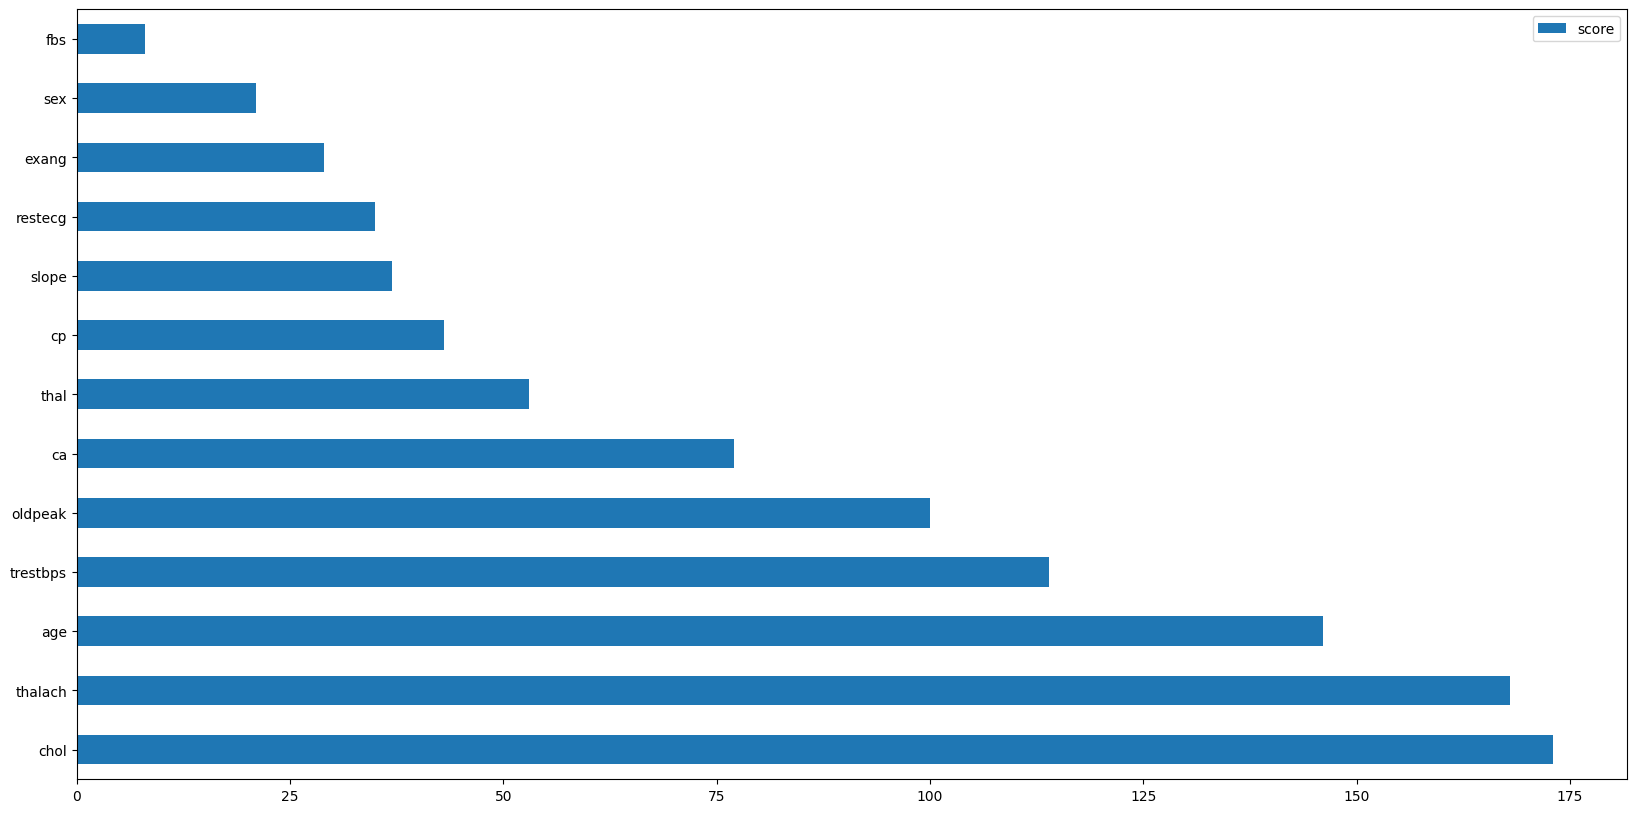

In [95]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(14, columns="score").plot(kind='barh', figsize = (20,10))

## SAVING MODEL

In [97]:
import pickle
filename = '/content/drive/MyDrive/datafiles/finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
